# Linear Regression algorithm

Linear regression assumes relation between input variable and output. It predicts the output as a linear function from input variables.

Various methods of Linear Regression 
- Simple Linear Regression
 - Requires to calculate mean, std-deviation, co-variance, corelation 
- Ordinary Least Squares
 - uses Linear Algebra to estimate best values for co-efficients
- Gradient Descent
 - Iteratively miniize the error of model this it gets to a minimum
- Regularized Linear Regression
 - Lasso Regression 
 - Rdige Regression


# Introduction and Terminology

Lets say we have below sample data. 

| size in feet | price ($) |
| ------  | ----- |
| 2104 | 460 |
| 1416 | 232 |

$m$ = number of training example

$x$ = input variable/ feature/ independent variable/ predictor

$y$ = output variable/ target variable/ dependent variable

![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcblx0QVtUcmFpbmluZyBTZXRdIC0tPiBCKExlYXJuaW5nIEFsZ29yaXRobSlcblx0QiAtLT4gaFxuICAgIENbc2l6ZSBvZiBob3VzZV0gLS0-IGhcbiAgICBoIC0tPiBEW0VzdGltYXRlZCBQcmljZV1cblxuIiwibWVybWFpZCI6eyJ0aGVtZSI6ImRlZmF1bHQifSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)

How do we represent h ?

**Hypothesis**:
$h_\theta(x) = \theta_0 + \theta_1 * x$

$h(x)$ is predictor of $y$

This is linear regression with one variable

Let's express this as Matrix and vectors

$h_\theta(x) = \begin{pmatrix} x \\ 1\end{pmatrix}^T * \begin{pmatrix} \theta_1 \\ \theta_0\end{pmatrix}$

Let $ X = \begin{pmatrix} x \\ 1\end{pmatrix}^T$ and $\theta = \begin{pmatrix} \theta_1 \\ \theta_0\end{pmatrix}$

we can write it as $ h_\theta(x) = X * \theta $

We need to choose $\theta_0$ and $\theta_1$ so it best fits our function

# Simple Linear Regression

- uses stats to estimate co-efficients
- need to calculate mean, std-devitation, co-variance and corelation.

Lets generate some data for simple linear regression. Lets take house price prediction example

Linear equation for our calculations is $y = \theta_1 * x + \theta_0$

**Steps**:

- **Estimate the slope $\theta_1$**

\begin{equation}
\\\theta_1 = \frac{\sum(x_i – mean(x)) (y_i – mean(y)} {\sum(x_i – mean(x))^2}
\end{equation}

where 

\begin{equation}
mean(x) = \frac{1}{n}\sum_{i=1}^n x_i
\end{equation}

- **Estinmate the intercept $\theta_0$**

\begin{equation}
\theta_0 = mean(y) – \theta_1 * mean(x)
\end{equation}

- **Estimating Error**

Root Mean Square Error 

$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(h_{i} - y_{i})^{2}}$

$h_i$ is predicted value and $y_i$ is actual value


In [0]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Generate Data

In [18]:
# Generate 'random' data
np.random.seed(0)
no_of_records=200
sq_ft = 50 * np.random.rand(no_of_records) + 500  # Array of 100 values with mean = 1000
res = 5 * np.random.randn(no_of_records)       # Generate 100 residual terms
price = 2 * sq_ft + 1000 + res                  # Actual values of Y

# create pandas dataframe to store size and price
df = pd.DataFrame(
    {'sq_ft': sq_ft,
     'price': price}
)

# first five rows of our dataframe
df.head()

,sq_ft,price
0,527.440675,2060.514530
1,535.759468,2066.119279
2,530.138169,2054.538994
3,527.244159,2052.299218
4,521.182740,2039.875318


### Visualize Data

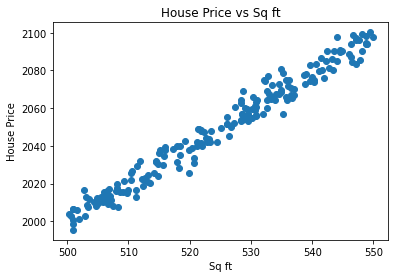

In [19]:
X = df.iloc[:, 0]
Y = df.iloc[:, 1]
plt.title('House Price vs Sq ft') 
plt.xlabel('Sq ft')  
plt.ylabel('House Price')  
plt.scatter(X,Y)

### Build the model

Lets calculate

\begin{equation}
\\m = \frac{\sum(x_i – mean(x)) (y_i – mean(y)} {\sum(x_i – mean(x))^2}
\end{equation}

\begin{equation}
c = mean(y) – \theta_1 * mean(x)
\end{equation}

In [20]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean) # sum of all differences in numerator
    den += (X[i] - X_mean)**2 # sum of all differences in denom
m = num / den # final slope \theta_1
c = Y_mean - m*X_mean # final intercept \theta_0

print (m, c)

1.956195597832525 1022.4369105614524


Now our linear equation is $House Price (Y) = (1.956195597832525) * x + (1022.4369105614524)$


Lets plot and visualize it


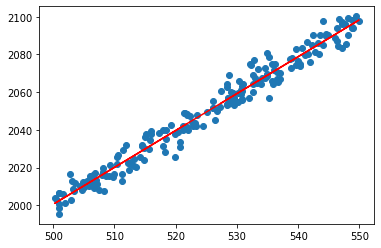

In [21]:
m = 1.956195597832525
b = 1022.4369105614524
Y_pred = m*X+b # predicted values
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

### Check accuracy

Lets check how accurate is our model by estimating error. 

$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(h_{i} - y_{i})^{2}}$

In [22]:
Y = df.iloc[:, 1] # observed
Y_pred 
summation = 0  #summation of differences
n = len(Y) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = Y[i] - Y_pred[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print("ROOT Mean Square Error is: {}".format(MSE))

ROOT Mean Square Error is: 22.826601317067663


This mean 22% of time our estimation is not accurate.

# Cost function 

Lets see how can we choose parameters $\theta_0$ and $\theta_1$

Let y be result after substitution

**Cost Function**: 

$J(\theta_0, \theta_1) = \sum\limits_{i=1}^m (y_{predicted} - y_{actual})^2$

$J(\theta_0, \theta_1) = \dfrac{1}{2m}\sum\limits_{i=1}^m (h_\theta(x^i) - y^i)^2$

**Goal** : minimize $J(\theta_0, \theta_1)$

Linear regression uses `Gradient Descent` to minimize the cost Function

To find the values ​$\theta_0$ and $\theta_1$, we will need mean of X and Y. We will find these and the coeffients.


---



In [23]:
#hide
#initial MSE
def mse_calc(slope, intercept, m, n):
    tot_error = 0
    pred = []
    for i in range(len(m)):
        print("i value {}".format(i))
        x = sq_ft[i]
        y = price[i]
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x) + intercept))
        tot_error += (y - ((slope*x) + intercept)) ** 2
    error = tot_error / float(len(m))
    return error, pred

sq_ft = np.array(df["sq_ft"].tolist())
price = np.array(df["price"].tolist())

mse_calc(1,2,x,y)

NameError: ignored

In [0]:
#hide
import numpy as np

iterations = 60
def gradient_descent(x,y):
    theta_1 = theta_0 = 0
    n = len(x)
    print ("s length {}".format(n))
    learning_rate = 0.01

    m = []
    cost_list = []

    for i in range(iterations):
        y_predicted = theta_1 * x + theta_0
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        cost_list.append(cost)
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        theta_1 = theta_1 - learning_rate * md
        theta_0 = theta_0 - learning_rate * bd
        #print ("m {}, b {}, cost {} iteration {}".format(theta_1,theta_0,cost, i))
    return md, bd, cost, cost_list
        

x = np.array(df["sq_ft"].tolist())
y = np.array(df["price"].tolist())

m_current, b_current, cost, cost_list = gradient_descent(x,y)
plt.plot(list(range(iterations)), cost_list, '-r') 